# 주제 : <br>우리 애는 머리는 좋은데, 공부를 안해서 그래요 - 데이터로 살펴보는 우리 아이 학습 성공/실패 요소
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 xAPI-Edu-Data 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    xAPI-Edu-Data.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    gender: 학생의 성별 (M: 남성, F: 여성)
    NationaliTy: 학생의 국적
    PlaceofBirth: 학생이 태어난 국가
    StageID: 학생이 다니는 학교 (초,중,고)
    GradeID: 학생이 속한 성적 등급
    SectionID: 학생이 속한 반 이름
    Topic: 수강한 과목
    Semester: 수강한 학기 (1학기/2학기)
    Relation: 주 보호자와 학생의 관계
    raisedhands: 학생이 수업 중 손을 든 횟수
    VisITedResources: 학생이 과목 공지를 확인한 횟수
    Discussion: 학생이 토론 그룹에 참여한 횟수
    ParentAnsweringSurvey: 부모가 학교 설문에 참여했는지 여부
    ParentschoolSatisfaction: 부모가 학교에 만족했는지 여부
    StudentAbscenceDays: 학생의 결석 횟수 (7회 이상/미만)
    Class: 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)
        
    
    
- 데이터 출처: https://www.kaggle.com/aljarah/xAPI-Edu-Data

## 최종 목표
    - 연구용 Tabular 데이터의 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - Logistic Regression, XGBoost 기반의 모델 학습 방법 습득
    - 학습된 모델의 평가 방법 및 시각화 방법 습득

- 출제자 : 신제용 강사
---

## Step 0. 의료 데이터셋에 대하여

### 연구용 데이터의 목적


### 연구용 데이터의 인용


## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [4]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기


os.environ['KAGGLE_USERNAME'] = 'ollpp123'
os.environ['KAGGLE_KEY']='df855af2cfc5de0b444fb1770d170706'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [5]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기

! kaggle datasets download -d aljarah/xAPI-Edu-Data
! unzip '*.zip'    # 모든 압축 파일을 해제한다.


  0% 0.00/5.54k [00:00<?, ?B/s]
100% 5.54k/5.54k [00:00<00:00, 9.63MB/s]
Archive:  xAPI-Edu-Data.zip
  inflating: xAPI-Edu-Data.csv       


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [6]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('xAPI-Edu-Data.csv')

In [7]:
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [8]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())

df.head()



,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
# 연구형 데이터이기 때문에 결측치가 없음을 알 수 있다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [9]:
# 수치로 나타나있는 데이터들에 대한 일반적 정리

df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [10]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [11]:
# 컬럼에 속해 있는 value 갯수 확인

df['gender'].value_counts()

M    305
F    175
Name: gender, dtype: int64

In [12]:
df['NationalITy'].value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
Lybia            6
USA              6
Iran             6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

### 문제 5. 수치형 데이터의 히스토그램 그리기


In [13]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

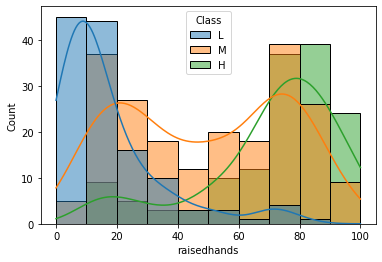

In [14]:
# seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기

sns.histplot(x='raisedhands', data=df, hue='Class', hue_order=['L', 'M', 'H'], kde=True)
# L, M, H 에 대한 데이터 분포를 확인할 수 있다.

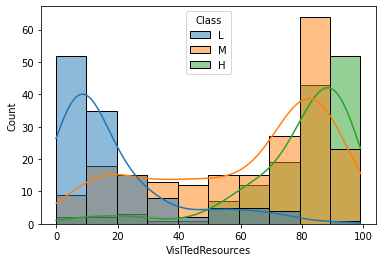

In [15]:
sns.histplot(x='VisITedResources', data=df, hue='Class', hue_order=['L', 'M', 'H'], kde=True)

# 수업 외적으로 수업 resource에 관심이 많을 수록 성적이 적어지는 경향이 줄어든다.

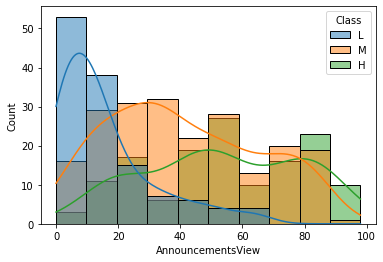

In [16]:
sns.histplot(x='AnnouncementsView', data=df, hue='Class', hue_order=['L', 'M', 'H'], kde=True)

# 공지에 관심이 적은 학생들은 성적이 낮다.
# 성적이 높은 학생일지라도 공지에 대한 관심이 적을 수 있다.

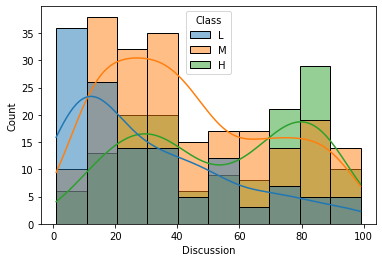

In [17]:
sns.histplot(x='Discussion', data=df, hue='Class', hue_order=['L', 'M', 'H'], kde=True)

# 성적이 L인 학생들이 다른 지표대비 참여횟수가 높다.
# 성적이 H인 학생들이 다른 지표대비 참여횟수가 낮다.
# 참가를 덜 하는 학생이 M에 모여있다.
# 다른 데이터 대비 큰 경향성이 없다고 볼 수 있다.

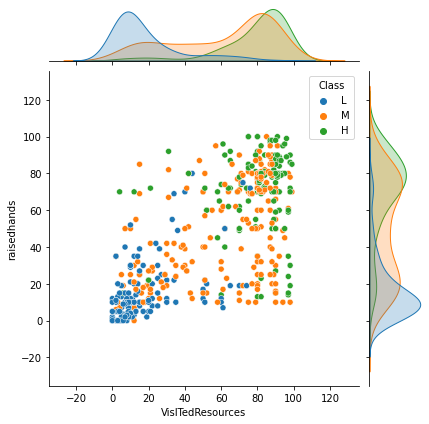

In [18]:
# 잘 갈라주는 요인 2개로 jointplot을 진행해본다.
sns.jointplot(x='VisITedResources', y='raisedhands', data=df, hue='Class', hue_order=['L', 'M', 'H'])

# 2D 상으로 볼 떄도 M과 H는 구분이 잘 안간다.
# 대신, L인 경우에 대한 직관적인 확인이 가능하다.

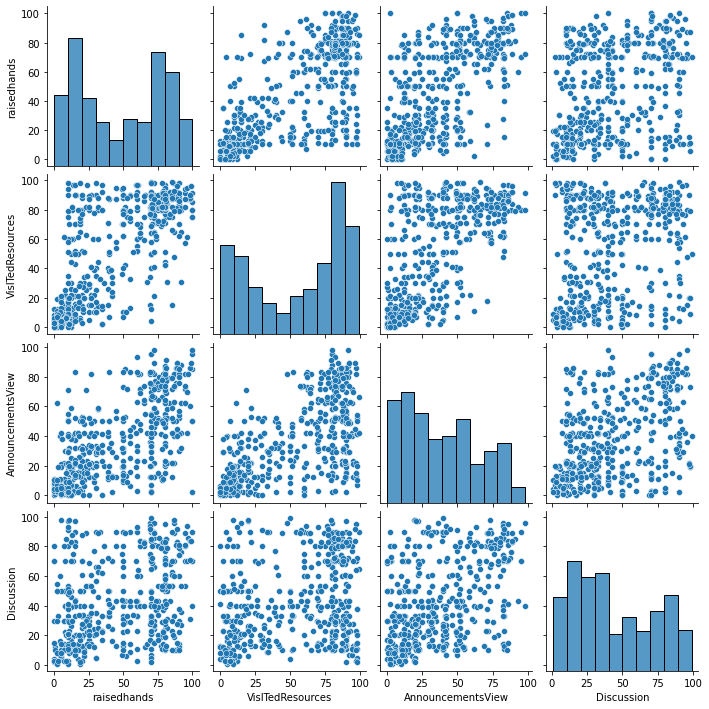

In [19]:
# pairplot : 모든 요인들간의 jointplot을 보여준다.

sns.pairplot(df)

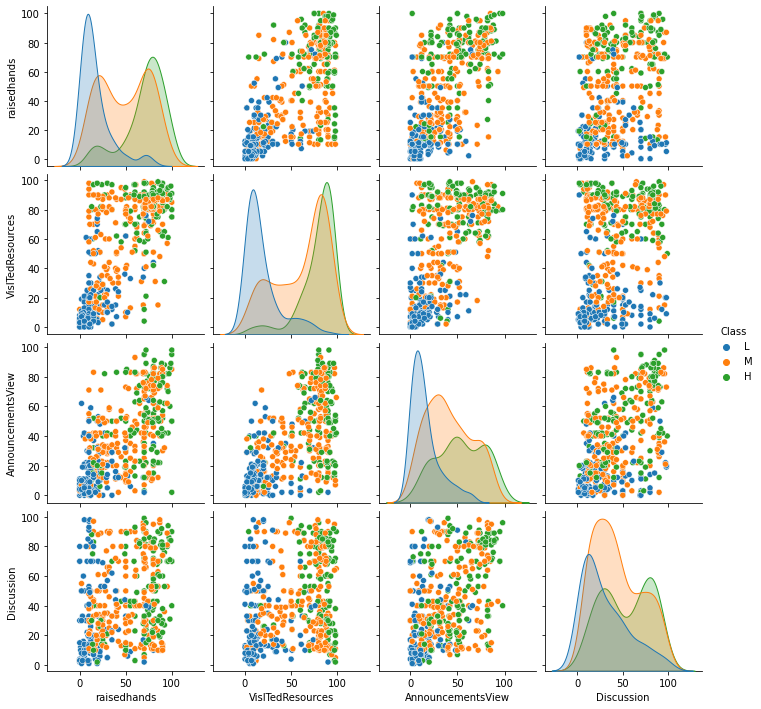

In [20]:
sns.pairplot(df, hue='Class', hue_order=['L','M','H'])

# pairplot을 했을 때 scatterplot이 1자로 나타날 수록 상관성이 높다.
# 만약 흩어진 정도가 클 수록 상관성이 낮다고 볼 수 있다.

### 문제 6. Countplot을 이용하여 범주별 통계 확인하기


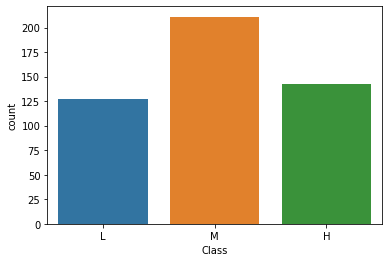

In [22]:
# seaborn의 countplot()을 사용
# Hint) x와 hue를 사용하여 범주별 Class 통계 확인

sns.countplot(x='Class', data=df, order=['L', 'M', 'H'])



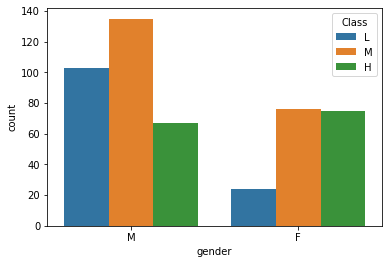

In [23]:
# 카테고리별로 나누어 L, M, H 별 비율을 알아본다.

sns.countplot(x='gender', data=df, hue='Class', hue_order=['L', 'M', 'H'])

# 남학생들이 여학생들보다 숫자는 많지만, 여학생들이 고성적인 비율이 높다.

In [24]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

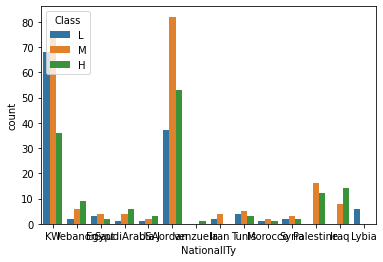

In [25]:
sns.countplot(x='NationalITy', data=df, hue='Class', hue_order=['L', 'M', 'H'])

# 국적에 따른 비율은 잘안보인다.

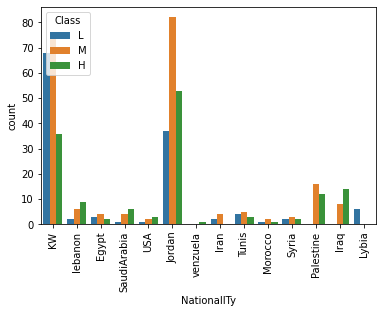

In [26]:
sns.countplot(x='NationalITy', data=df, hue='Class', hue_order=['L', 'M', 'H'])
plt.xticks(rotation=90)
plt.show()

# 이와 같은 분석은 상관관계에 대한 간단한 이해를 돕는데만 확인!

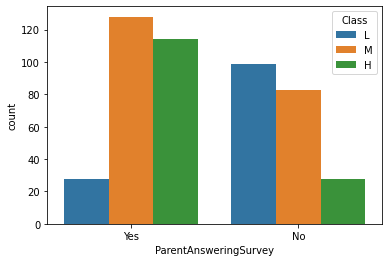

In [28]:
sns.countplot(x='ParentAnsweringSurvey', data=df, hue='Class', hue_order=['L', 'M', 'H'])

# 부모가 survey에 응한경우 성적이 높은 가능성이 높다!!
# 부모의 관심이 높을수록 성적이 높을 수 있다.

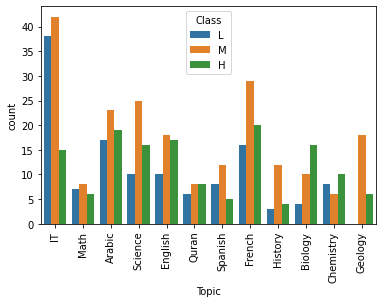

In [29]:
sns.countplot(x='Topic', data=df, hue='Class', hue_order=['L', 'M', 'H'])
plt.xticks(rotation=90)
plt.show()

# IT를 선택한 학생들의 성적이 낮게 나오는 경향이 있다.

### 문제 7. 범주형 대상 Class 컬럼을 수치로 바꾸어 표현하기

In [8]:
# L, M, H를 숫자로 바꾸어 표현하기 (eg. L: -1, M: 0, H:1) -> 임의로 점수부여
# Hint) DataFrame의 map() 메소드를 사용

df['Class_value'] = df['Class'].map(dict(L=-1, M=0, H=1))
df.head()


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_value
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,-1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,-1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,0


In [34]:
gb_gender = df.groupby('gender').mean()['Class_value']
gb_gender

# 남학생들은 L에 해당하는 학생들이 더 많았기 떄문에 음수로 나타난다.


gender
F    0.291429
M   -0.118033
Name: Class_value, dtype: float64

<BarContainer object of 2 artists>

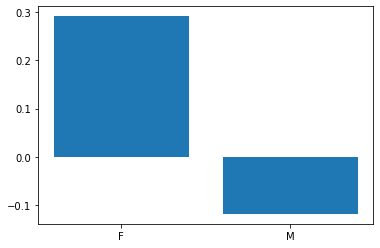

In [33]:
gb = df.groupby('gender').mean()['Class_value']

# 남학생들은 L에 해당하는 학생들이 더 많았기 떄문에 음수로 나타난다.
plt.bar(gb.index, gb)

<BarContainer object of 12 artists>

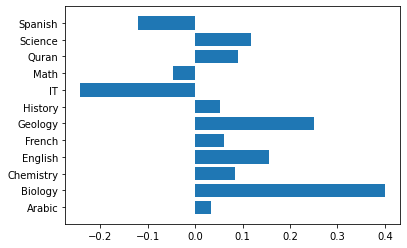

In [36]:
gb = df.groupby('Topic').mean()['Class_value']


# 남학생들은 L에 해당하는 학생들이 더 많았기 떄문에 음수로 나타난다.
plt.barh(gb.index, gb)

<BarContainer object of 12 artists>

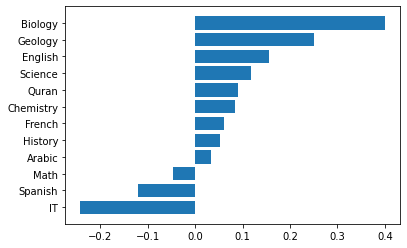

In [37]:
# 정렬시켜서 나타낸다.
gb = df.groupby('Topic').mean()['Class_value'].sort_values()


# 남학생들은 L에 해당하는 학생들이 더 많았기 떄문에 음수로 나타난다.
plt.barh(gb.index, gb)

<BarContainer object of 2 artists>

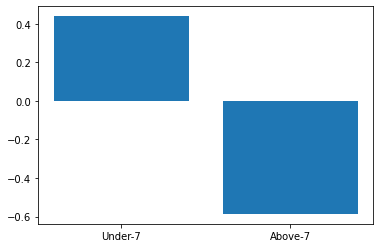

In [38]:
gb = df.groupby('StudentAbsenceDays').mean()['Class_value'].sort_values(ascending=False)


# 남학생들은 L에 해당하는 학생들이 더 많았기 떄문에 음수로 나타난다.
plt.bar(gb.index, gb)

In [ ]:
# 숫자로 바꾼 Class_value 컬럼을 이용해 다양한 시각화 수행하기






## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 8. get_dummies()를 이용하여 범주형 데이터 전처리하기


In [9]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'Class_value'],
      dtype='object')

In [18]:
# pd.get_dummies()를 이용해 범주형 데이터를 one-hot 벡터로 변환하기 -> categorical data를 잘 표현해준다!!
# Hint) Multicollinearity를 피하기 위해 drop_first=True로 설정

# 수치형 데이터는 그대로 있고, drop할것들은 drop 해준다.
# drop 써주는 이유 : columns에 써주지 않으면 전부 numerical이라 생각해줘서 그대로 가져온다.
# 따라서 제외시키기 위해 따로 drop 시켜준다.
# axis=0 : row에서 drop 시켜준다. 
# axis=1 : columns에서 drop 시켜준다. 
X = pd.get_dummies(df.drop(['ParentschoolSatisfaction', 'Class', 'Class_value'], axis=1), 
                   columns=['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
                            'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
                            'StudentAbsenceDays'], drop_first=True)    # 위에 multicollinearity
y = df['Class']



In [19]:
X

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,NationalITy_Morocco,NationalITy_Palestine,NationalITy_SaudiArabia,NationalITy_Syria,NationalITy_Tunis,NationalITy_USA,NationalITy_lebanon,NationalITy_venzuela,PlaceofBirth_Iran,PlaceofBirth_Iraq,PlaceofBirth_Jordan,PlaceofBirth_KuwaIT,PlaceofBirth_Lybia,PlaceofBirth_Morocco,PlaceofBirth_Palestine,PlaceofBirth_SaudiArabia,PlaceofBirth_Syria,PlaceofBirth_Tunis,PlaceofBirth_USA,PlaceofBirth_lebanon,PlaceofBirth_venzuela,StageID_MiddleSchool,StageID_lowerlevel,GradeID_G-04,GradeID_G-05,GradeID_G-06,GradeID_G-07,GradeID_G-08,GradeID_G-09,GradeID_G-10,GradeID_G-11,GradeID_G-12,SectionID_B,SectionID_C,Topic_Biology,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,StudentAbsenceDays_Under-7
0,15,16,2,20,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
1,20,20,3,25,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
2,10,7,0,30,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,30,25,5,35,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,40,50,12,50,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
476,50,77,14,28,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
477,55,74,25,29,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
478,30,17,14,57,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### 문제 9. 학습데이터와 테스트데이터 분리하기


In [21]:
from sklearn.model_selection import train_test_split

In [24]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Step 4. Classification 모델 학습하기


### 문제 10. Logistic Regression 모델 생성/학습하기


In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression(max_iter=10000)
model_lr.fit(X_train, y_train)




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 문제 11. 모델 학습 결과 평가하기


In [27]:
from sklearn.metrics import classification_report

In [28]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))



              precision    recall  f1-score   support

           H       0.77      0.67      0.72        55
           L       0.79      0.79      0.79        33
           M       0.60      0.68      0.64        56

    accuracy                           0.70       144
   macro avg       0.72      0.71      0.71       144
weighted avg       0.71      0.70      0.70       144



### 문제 12. XGBoost 모델 생성/학습하기


In [29]:
from xgboost import XGBClassifier

In [30]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)





XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### 문제 13. 모델 학습 결과 평가하기


In [31]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))




              precision    recall  f1-score   support

           H       0.83      0.64      0.72        55
           L       0.79      0.82      0.81        33
           M       0.62      0.75      0.68        56

    accuracy                           0.72       144
   macro avg       0.75      0.73      0.74       144
weighted avg       0.74      0.72      0.72       144



## Step5 모델 학습 결과 심화 분석하기


### 문제 14. Logistic Regression 모델 계수로 상관성 파악하기

학습된 결과를 확인해서 학생들과의 관계를 보자

In [33]:
model_lr.classes_

array(['H', 'L', 'M'], dtype=object)

In [32]:
model_lr.coef_.shape

# 3은 클래스
# 59는 학습에 쓰고 있는 feature의 갯수!

(3, 59)

In [ ]:
# 성적을 좋게 하는 요인을 보고 싶으면 'H'가 있는 모듈을 선택해서 보면된다.

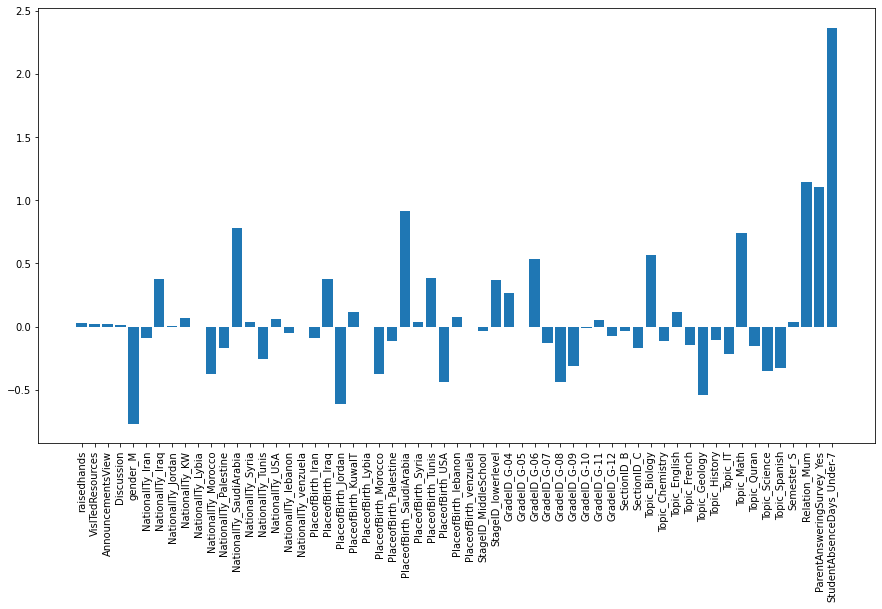

In [38]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
# logistic regression 학습된 결과를 보려면 각 컬럼들에 어떤 값들이 곱해졌는지를 출력해보면 된다.
# coef는 곱해진값들이 나온다.

# 결과를 잘 모를때는 xticks 사용
# 그래도 잘 모를 떄는 figure size를 조정해본다.


fig = plt.figure(figsize=(15, 8))
plt.bar(X.columns, model_lr.coef_[0,:])
plt.xticks(rotation=90)
plt.show()



logistic regression으로 분석한 결과 studentabsencedays가 가장 큰 요인으로 작용한다.
사우디아라비아에 살고 있는 학생들의 성적이 높다.

### 문제 15. XGBoost 모델로 특징의 중요도 확인하기

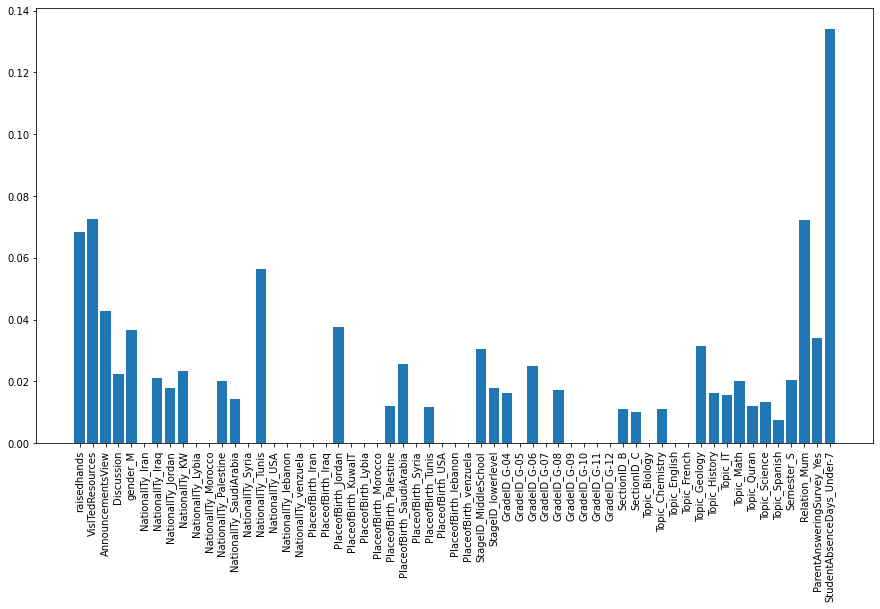

In [40]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기
fig = plt.figure(figsize=(15, 8))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()



여기서도 studentabsence가 가장 중요한 요인이다.